In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime

In [2]:
(x_train , y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
len(x_train)

60000

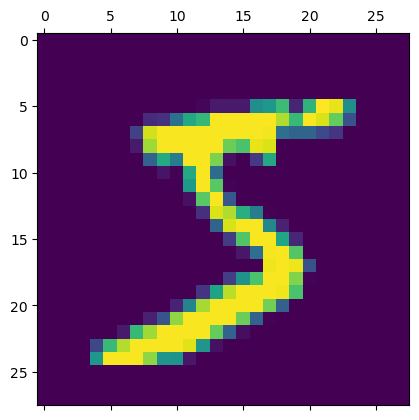

In [5]:
plt.matshow(x_train[0])

In [6]:
x_train= x_train/255
x_test=x_test/255

In [8]:
from tensorflow.compat.v1 import keras
from tensorflow.compat.v1.keras import layers
from tensorflow.compat.v1.keras.layers import Dense


In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")

])

model.compile(
     optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1253 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0889 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9836


In [18]:
#x_train_flatten=x_train.reshape(len(x_train),28*28)
#x_test_flatten=x_test.reshape(len(x_test),28*28)

In [21]:
y_predicted=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [23]:
y_predicted[0]

array([9.6883636e-04, 9.4850751e-04, 5.3248042e-01, 9.7445840e-01,
       1.5428615e-06, 1.2079146e-03, 2.2533913e-09, 9.9997348e-01,
       2.6837973e-02, 2.3566949e-01], dtype=float32)

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9793


[0.0709572434425354, 0.9793000221252441]

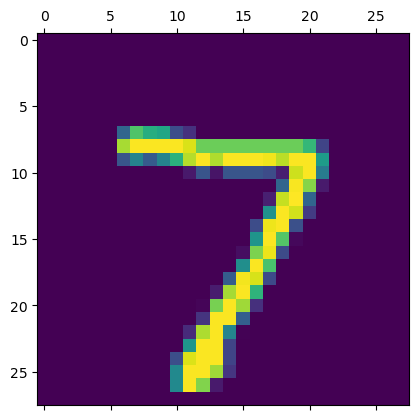

In [25]:
plt.matshow(x_test[0])

In [26]:
np.argmax(y_predicted[0])

7

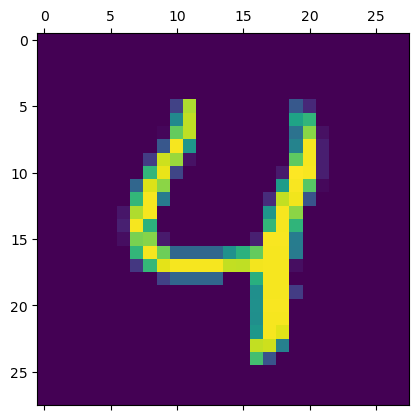

In [27]:
plt.matshow(x_test[4])

In [28]:
np.argmax(y_predicted[4])

4

In [29]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [30]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    2,    1,    1,    1,    1,    1,    0],
       [   0, 1123,    4,    0,    0,    0,    2,    1,    5,    0],
       [   5,    2,  998,    3,    5,    0,    2,    5,   12,    0],
       [   0,    0,    3,  993,    0,    2,    1,    4,    4,    3],
       [   0,    0,    4,    1,  961,    0,    1,    1,    2,   12],
       [   2,    0,    0,   12,    1,  864,    4,    1,    6,    2],
       [   4,    2,    1,    1,    1,    3,  943,    0,    3,    0],
       [   1,    6,    6,    1,    1,    0,    0, 1005,    2,    6],
       [   3,    0,    1,    3,    2,    3,    2,    4,  954,    2],
       [   4,    2,    0,    5,    9,    3,    0,    3,    3,  980]])>

Text(95.72222222222221, 0.5, 'Truth')

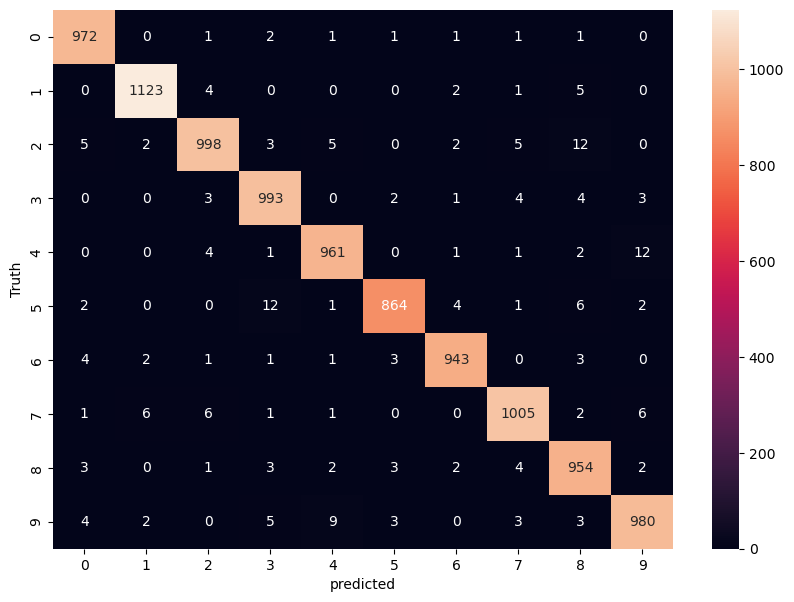

In [31]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

## using tensorboard to see the graphical representation of the accuracy

In [40]:

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")

])
tb_callback= tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(
     optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2736 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1271 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0894 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0542 - accuracy: 0.9833


In [42]:
%reload_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14504), started 0:00:00 ago. (Use '!kill 14504' to kill it.)